In [25]:
# All necessary imports 
import requests
import pandas as pd
import numpy as np


In [26]:
# Here i Define a class for ScriptData
class ScriptData:
# Here we initialize a constructor with parameters
    def __init__(self, api_key):
        self.api_key = api_key
# Here we store our dataframe 
        self.data = {}
    
# This function is used to get intraday data for 6omin interval
    def fetch_intraday_data(self, script):
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=60min&apikey={self.api_key}"
        response = requests.get(url)
        self.intraday_data = response.json()
        return self.intraday_data
    
# This function is used to convert intraday data into dataframe using pandas
    def convert_intraday_data(self, script):
        try:
            self.fetch_intraday_data(script)
            intraday_data = self.intraday_data["Time Series (60min)"]
            data = []
            for timestamp, values in intraday_data.items():
                data.append([timestamp, float(values["1. open"]), float(values["2. high"]), float(values["3. low"]), float(values["4. close"]), int(values["5. volume"])])
            self.df = pd.DataFrame(data, columns=["timestamp", "open", "high", "low", "close", "volume"])
            self.df['timestamp'] = pd.to_datetime(self.df['timestamp'])

            self.data[script] = self.df

            return self.df,self.data
        except Error as e:
            return e

In [27]:
# This function is used to take moving average of given timeperiod with parameters as df(dataframe) and timeperiod
def indicator1(df, timeperiod):
    indicator = df["close"].rolling(timeperiod).mean()
    indicator_df = pd.DataFrame({'timestamp': df['timestamp'][1:], 'indicator': indicator})
    return indicator_df

In [28]:
# Here we define a class for strategy for getting signals like buy,sell etc.
class Strategy:
    
    def __init__(self, api_key):
        self.script_data = ScriptData(api_key)
        
# This function is used to generate signals for buy and sell
    def generate_signals(self, script, timeperiod):
        self.script_data.convert_intraday_data(script)
        df = self.script_data.df
        indicator_df = indicator1(df, timeperiod)
        signals = []
        for i in range(1, len(df)):
            if indicator_df['indicator'][i] > df['close'][i] and indicator_df['indicator'][i-1] <= df['close'][i]:
                signals.append('BUY')
            elif indicator_df['indicator'][i] < df['close'][i] and indicator_df['indicator'][i-1] >= df['close'][i-1]:
                signals.append('SELL')
            else:
                signals.append('NO_SIGNAL')
        self.signals = pd.DataFrame({'timestamp': df['timestamp'][1:], 'signal': signals})
        return self.signals


In [29]:
api_key = "C00PZAXAW392MJA7"
script = "AAPL"
timeperiod = 5
script_data = ScriptData(api_key)

In [30]:
script_data.fetch_intraday_data(script)

{'Meta Data': {'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2023-02-13 20:00:00',
  '4. Interval': '60min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (60min)': {'2023-02-13 20:00:00': {'1. open': '153.7000',
   '2. high': '153.7000',
   '3. low': '153.6000',
   '4. close': '153.7000',
   '5. volume': '53172'},
  '2023-02-13 19:00:00': {'1. open': '153.8300',
   '2. high': '153.8400',
   '3. low': '153.6300',
   '4. close': '153.7100',
   '5. volume': '24978'},
  '2023-02-13 18:00:00': {'1. open': '153.7400',
   '2. high': '153.8900',
   '3. low': '153.7100',
   '4. close': '153.8000',
   '5. volume': '205821'},
  '2023-02-13 17:00:00': {'1. open': '153.8400',
   '2. high': '153.8500',
   '3. low': '153.6600',
   '4. close': '153.7100',
   '5. volume': '2873954'},
  '2023-02-13 16:00:00': {'1. open': '153.0700',
   '2. high': '153.9800',
   '3. low': '152.7600',
   '4. cl

In [31]:
script_data.convert_intraday_data(script)

(             timestamp      open      high       low     close    volume
 0  2023-02-13 20:00:00  153.7000  153.7000  153.6000  153.7000     53172
 1  2023-02-13 19:00:00  153.8300  153.8400  153.6300  153.7100     24978
 2  2023-02-13 18:00:00  153.7400  153.8900  153.7100  153.8000    205821
 3  2023-02-13 17:00:00  153.8400  153.8500  153.6600  153.7100   2873954
 4  2023-02-13 16:00:00  153.0700  153.9800  152.7600  153.8400  10885106
 ..                 ...       ...       ...       ...       ...       ...
 95 2023-02-06 05:00:00  153.2765  153.2765  152.6375  152.7274    118275
 96 2023-02-03 20:00:00  154.0554  154.1552  154.0154  154.1552     39258
 97 2023-02-03 19:00:00  153.9156  154.1153  153.8157  154.0454     49726
 98 2023-02-03 18:00:00  154.1951  154.2650  153.7958  153.9655    155453
 99 2023-02-03 17:00:00  154.2650  154.5346  153.8756  154.2001   4422622
 
 [100 rows x 6 columns],
 {'AAPL':              timestamp      open      high       low     close    volume
  

In [32]:
indicator1(script_data.data['AAPL'],timeperiod)

,timestamp,indicator
0,NaT,NaN
1,2023-02-13 19:00:00,NaN
2,2023-02-13 18:00:00,NaN
3,2023-02-13 17:00:00,NaN
4,2023-02-13 16:00:00,153.75200
...,...,...
95,2023-02-06 05:00:00,152.65350
96,2023-02-03 20:00:00,152.95704
97,2023-02-03 19:00:00,153.21864
98,2023-02-03 18:00:00,153.51818


In [33]:
script_data.data

{'AAPL':              timestamp      open      high       low     close    volume
 0  2023-02-13 20:00:00  153.7000  153.7000  153.6000  153.7000     53172
 1  2023-02-13 19:00:00  153.8300  153.8400  153.6300  153.7100     24978
 2  2023-02-13 18:00:00  153.7400  153.8900  153.7100  153.8000    205821
 3  2023-02-13 17:00:00  153.8400  153.8500  153.6600  153.7100   2873954
 4  2023-02-13 16:00:00  153.0700  153.9800  152.7600  153.8400  10885106
 ..                 ...       ...       ...       ...       ...       ...
 95 2023-02-06 05:00:00  153.2765  153.2765  152.6375  152.7274    118275
 96 2023-02-03 20:00:00  154.0554  154.1552  154.0154  154.1552     39258
 97 2023-02-03 19:00:00  153.9156  154.1153  153.8157  154.0454     49726
 98 2023-02-03 18:00:00  154.1951  154.2650  153.7958  153.9655    155453
 99 2023-02-03 17:00:00  154.2650  154.5346  153.8756  154.2001   4422622
 
 [100 rows x 6 columns]}

In [34]:
"GOOGL" in script_data.data

False

In [35]:
"AAPL" in script_data.data

True

In [36]:
"NVDA" in script_data.data

False

In [37]:
script_data.data['AAPL']

,timestamp,open,high,low,close,volume
0,2023-02-13 20:00:00,153.7000,153.7000,153.6000,153.7000,53172
1,2023-02-13 19:00:00,153.8300,153.8400,153.6300,153.7100,24978
2,2023-02-13 18:00:00,153.7400,153.8900,153.7100,153.8000,205821
3,2023-02-13 17:00:00,153.8400,153.8500,153.6600,153.7100,2873954
4,2023-02-13 16:00:00,153.0700,153.9800,152.7600,153.8400,10885106
...,...,...,...,...,...,...
95,2023-02-06 05:00:00,153.2765,153.2765,152.6375,152.7274,118275
96,2023-02-03 20:00:00,154.0554,154.1552,154.0154,154.1552,39258
97,2023-02-03 19:00:00,153.9156,154.1153,153.8157,154.0454,49726
98,2023-02-03 18:00:00,154.1951,154.2650,153.7958,153.9655,155453


In [38]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=script_data.data['AAPL']['timestamp'],
                open=script_data.data['AAPL']['open'],
                high=script_data.data['AAPL']['high'],
                low=script_data.data['AAPL']['low'],
                close=script_data.data['AAPL']['close'])])

fig.show()

In [39]:
strategy = Strategy(api_key)

In [40]:
strategy.generate_signals(script,timeperiod)

,timestamp,signal
1,2023-02-13 19:00:00,NO_SIGNAL
2,2023-02-13 18:00:00,NO_SIGNAL
3,2023-02-13 17:00:00,NO_SIGNAL
4,2023-02-13 16:00:00,NO_SIGNAL
5,2023-02-13 15:00:00,NO_SIGNAL
...,...,...
95,2023-02-06 05:00:00,NO_SIGNAL
96,2023-02-03 20:00:00,NO_SIGNAL
97,2023-02-03 19:00:00,NO_SIGNAL
98,2023-02-03 18:00:00,NO_SIGNAL


In [42]:
df_ind = indicator1(script_data.data['AAPL'],timeperiod)

In [46]:
len(df_ind)

100

In [50]:
for i in df_ind.index:
    
    if df_ind['indicator'][i] > script_data.data['AAPL']['close'][i] and df_ind['indicator'][i-1] <= script_data.data['AAPL']['close'][i]:
        print(str(script_data.data['AAPL']['close'][i])+"------"+ str(df_ind['indicator'][i]) )

151.02------151.04199999999994
150.6505------150.76233999999997
153.1368------153.18167999999997


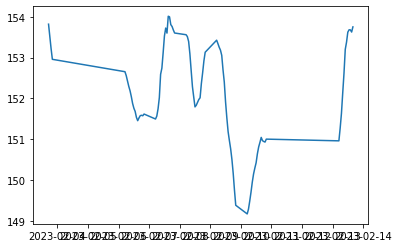

In [52]:
# importing package
import matplotlib.pyplot as plt
  
# create data
x = script_data.data['AAPL']['timestamp']
y = df_ind['indicator']
  
# plot line
plt.plot(x, y)
plt.show()

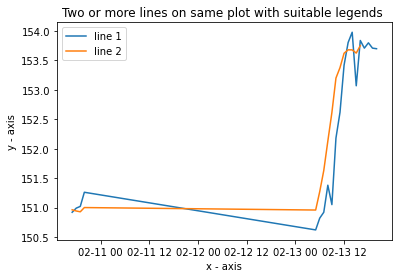

In [54]:
import matplotlib.pyplot as plt
# line 1 points
x1 = script_data.data['AAPL']['timestamp'].head(20)
y1 = script_data.data['AAPL']['close'].head(20)
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
# line 2 points
x2 = script_data.data['AAPL']['timestamp'].head(20)
y2 = df_ind['indicator'].head(20)
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()